# DataCreator / Modeling ipynb

## Installing necessary modules on VM

In [25]:
#!pip install python-chess
#!pip install pystockfish
#!pip install pyarrow

## Accessing Cloud Storage for games and StockFish chess engine

In [3]:
from google.cloud import storage

In [35]:
client=storage.Client()
bucket_name = 'shallowmindfiles'

folders = ['ShallowMind', 'stockfish-11-mac', 'stockfish-11-linux',
           'stockfish-11-linux/Linux', 'stockfish-11-linux/src', 'stockfish-11-linux/tests', 'stockfish-11-linux/src/syzygy',
           'stockfish-11-mac/Mac', 'stockfish-11-mac/src','stockfish-11-mac/tests','stockfish-11-mac/src/syzygy']

for folder in folders:
    if not os.path.exists(folder):
        os.makedirs(folder)


"\nclient=storage.Client()\nbucket_name = 'shallowmindfiles'\n\nfolders = ['ShallowMind', 'stockfish-11-mac', 'stockfish-11-linux',\n           'stockfish-11-linux/Linux', 'stockfish-11-linux/src', 'stockfish-11-linux/tests', 'stockfish-11-linux/src/syzygy',\n           'stockfish-11-mac/Mac', 'stockfish-11-mac/src','stockfish-11-mac/tests','stockfish-11-mac/src/syzygy']\n\nfor folder in folders:\n    if not os.path.exists(folder):\n        os.makedirs(folder)\n"

In [36]:
bucket = client.get_bucket(bucket_name)
for folder in folders:
    blobs = list(bucket.list_blobs(prefix=folder))
    for blob in blobs:
        if(not blob.name.endswith('/')):
            blob.download_to_filename(blob.name)


"\nbucket = client.get_bucket(bucket_name)\nfor folder in folders:\n    blobs = list(bucket.list_blobs(prefix=folder))\n    for blob in blobs:\n        if(not blob.name.endswith('/')):\n            blob.download_to_filename(blob.name)\n"

## Importing Standard ETL tools (and chess...)

In [1]:
import pandas as pd
import numpy as np
import chess
import pickle

import itertools
import os

## *Starting implementation of pyspark on data collection*
Work in progress - trying to parallelize the data processing phase of the project to greatly enhance data collection speed.

Main issue - All the moves in each game should be grouped together in th RDD

Potential issue - Trying to run StockFish across multiple nodes

In [1]:
import pyspark

sc = pyspark.SparkContext('local[*]')

In [7]:
nums = sc.range(12345678)
nums

PythonRDD[5] at RDD at PythonRDD.scala:53

In [8]:
%%time
squared = nums.map(lambda x: x*x)

CPU times: user 33 µs, sys: 2 µs, total: 35 µs
Wall time: 41 µs


In [9]:
test = list(range(12345678))

In [10]:
%%time
test_square = map(lambda x: x*x, test)

CPU times: user 131 ms, sys: 81.7 ms, total: 213 ms
Wall time: 236 ms


In [34]:
def stockfish_eval(move):
    engine = chess.engine.SimpleEngine.popen_uci('stockfish-11-mac/Mac/stockfish-11-64')
    info = engine.analyse(board, chess.engine.Limit(depth=5))
    x = str(info['score']).replace('#+', '999')
    x = x.replace('#-', '-999')
    score = (int(x), get_bitwise(clean_fen(board.board_fen())))
    board.push_san(i)
            
    # This moves the next piece and it repeats...
    
    
    #except:
     #   board = chess.Board()
        
    return(score)

In [35]:
import itertools
sc_san_rdd = sc.parallelize(list(itertools.chain.from_iterable(all_san_list)))
type(sc_san_rdd.sum())

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 1.0 failed 1 times, most recent failure: Lost task 1.0 in stage 1.0 (TID 2, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 377, in main
    process()
  File "/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 372, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 2499, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 352, in func
    return f(iterator)
  File "/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 1046, in <lambda>
    return self.mapPartitions(lambda x: [sum(x)]).fold(0, operator.add)
TypeError: unsupported operand type(s) for +: 'int' and 'str'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:456)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:592)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:575)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$class.foreach(Iterator.scala:891)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:945)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 377, in main
    process()
  File "/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 372, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 2499, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 352, in func
    return f(iterator)
  File "/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 1046, in <lambda>
    return self.mapPartitions(lambda x: [sum(x)]).fold(0, operator.add)
TypeError: unsupported operand type(s) for +: 'int' and 'str'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:456)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:592)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:575)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$class.foreach(Iterator.scala:891)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:945)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [36]:
sc_san_rdd.take(5)

['d4', 'e6', 'c4', 'd5', 'Nf3']

In [37]:
def add_letter(move):
    k = move + '-t'
    return(k)

In [38]:
%%time
sc_san_rdd.map(stockfish_eval).collect()[:10]

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 3.0 failed 1 times, most recent failure: Lost task 0.0 in stage 3.0 (TID 6, localhost, executor driver): java.net.SocketException: Connection reset
	at java.net.SocketInputStream.read(SocketInputStream.java:210)
	at java.net.SocketInputStream.read(SocketInputStream.java:141)
	at java.io.BufferedInputStream.fill(BufferedInputStream.java:246)
	at java.io.BufferedInputStream.read(BufferedInputStream.java:265)
	at java.io.DataInputStream.readInt(DataInputStream.java:387)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:582)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:575)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$class.foreach(Iterator.scala:891)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:945)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.net.SocketException: Connection reset
	at java.net.SocketInputStream.read(SocketInputStream.java:210)
	at java.net.SocketInputStream.read(SocketInputStream.java:141)
	at java.io.BufferedInputStream.fill(BufferedInputStream.java:246)
	at java.io.BufferedInputStream.read(BufferedInputStream.java:265)
	at java.io.DataInputStream.readInt(DataInputStream.java:387)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:582)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:575)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$class.foreach(Iterator.scala:891)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1$$anonfun$13.apply(RDD.scala:945)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


# Back to Reality
### Loading data and parsing the text file for moves, results and openings

In [20]:
game_list = [line for line in open('GMallboth.pgn')] 

all_moves_list = []
i = 11
while i <= (len(game_list)/200):           ###### NOTE: '/200' only using 1% of the data availible from grandmasters
    all_moves_list.append(game_list[i])
    i += 16
    
    
all_results = []
i = 13
while i <= (len(game_list)/200):
    all_results.append(game_list[i])
    i += 16
    
all_openings = []
i = 7
while i <= (len(game_list)/200):
    all_openings.append(game_list[i])
    i += 16

## Function for getting the moves cleaned up

In [21]:
def get_move_list(move_string): #### input is a string 
    '''
    Takes a move string that was striped from a PGN format, and removes unwanted characters and conserves SAN format.
    
    Input: String of plain text moves in string format
    Output: List of SAN moves
    
    '''
    testing = move_string 
    testing = testing[0:-2]  ### remove last 2 characters = '\n'
    testing = testing.split('. ')
    
    for i in range(len(testing)):
        testing[i] = testing[i].split(' ')
    for i in testing:
        try:
            del(i[2])
        except:
            continue
    del(testing[0])

    simplelist = list(itertools.chain.from_iterable(testing))
    return(simplelist)

## Applying the function from above

In [22]:
%%time
all_san_list = [get_move_list(game) for game in all_moves_list]
print(len(all_san_list))
len_list = []
for game in all_san_list:
    for move in game:
        len_list.append(move)
print(len(len_list))
all_san_list[0][:10]    ### First game, first 10 moves

1378
122111
CPU times: user 222 ms, sys: 18.7 ms, total: 240 ms
Wall time: 331 ms


['d4', 'e6', 'c4', 'd5', 'Nf3', 'Nf6', 'Nc3', 'Bb4', 'Bg5', 'h6']

## The Stockfish engine

In [23]:
from stockfish import Stockfish

stockfish = Stockfish('stockfish-11-mac/Mac/stockfish-11-64')

## Functions that will run in the data collection cell

In [24]:
def clean_fen(string):
    '''
    Takes a fen with extraneous features
    
    input: plain FEN notation i.e: rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR
    output: 1x64 list - with piece abbriviation in position, open space as '1'
    '''
    string = string.replace('8','1'*8)
    string = string.replace('7','1'*7)
    string = string.replace('6','1'*6)
    string = string.replace('5','1'*5)
    string = string.replace('4','1'*4)
    string = string.replace('3','1'*3)
    string = string.replace('2','1'*2)
    string = string.replace('1','1'*1)
    string = string.replace('/','')
    string_list = [i for i in string]
    string_array = np.asarray(string_list)
    
    return(string_array)


def get_bitwise(board_state):
    '''
    Takes a [1x64] board state and creates 6 bitwise [1x64]
    '''
    bs = board_state #test ---- #First posiiton tuple  #winning_position[0][0] - for i in range:
    r_ray = np.zeros(64)
    n_ray = np.zeros(64)
    b_ray = np.zeros(64)
    q_ray = np.zeros(64)
    k_ray = np.zeros(64)
    p_ray = np.zeros(64)
    for i in range(64):
        if bs[i] == 'r':
            r_ray[i] = -1
        if bs[i] == 'R':
            r_ray[i] = 1 
        
        if bs[i] == 'b':
            b_ray[i] = -1
        if bs[i] == 'B':
            b_ray[i] = 1
        
        if bs[i] == 'n':
            n_ray[i] = -1
        if bs[i] == 'N':
            n_ray[i] = 1 
    
        if bs[i] == 'q':
            q_ray[i] = -1
        if bs[i] == 'Q':
            q_ray[i] = 1
    
        if bs[i] == 'k':
            k_ray[i] = -1
        if bs[i] == 'K':
            k_ray[i] = 1 
        
        if bs[i] == 'p':
            p_ray[i] = -1
        if bs[i] == 'P':
            p_ray[i] = 1 
    master_ray = np.array((r_ray.astype('int8'), n_ray.astype('int8'), b_ray.astype('int8'), q_ray.astype('int8'), k_ray.astype('int8'), p_ray.astype('int8')))
    return(master_ray)

## Here is the real Data Creator!
 - I am loading stockfish as the engine, and iterating through each move in each game
 - On the Virtual machine I was using, each move takes about 1 second to evaluate at depth 9
     - Although it takes longer, in the future, I would like the depth to be deeper in order to reduce the variance amongst evaluations of the same board states
 - Embedded in the info variable is a score, which corresponds to stockfishes evaluation of the current board state
 - In the replace statements methods, I'm replacing projected checkmates with a large cp 
 - It advances the next move and the process repeats
 


In [25]:
import chess.engine

In [27]:
test_games = all_san_list[:5]

In [9]:
%%time
import pickle
list_scores = []
list_turn = []

engine = chess.engine.SimpleEngine.popen_uci('stockfish-11-mac/Mac/stockfish-11-64')

for game in test_games:
    board = chess.Board()
    for i in game:
        try:
            info = engine.analyse(board, chess.engine.Limit(depth=10))
            x = str(info['score']).replace('#+', '999') # Replaces projected checkmate term with an extremly positive 
            x = x.replace('#-', '-999')                 # Replaces projected checkmate term with an extremly negative
            list_depth.append(info['depth'])
            list_scores.append((int(x), get_bitwise(clean_fen(board.board_fen())))) 
        except:
            continue   
        #This moves the next piece and it repeats...
        board.push_san(i)

#with open('bitwise_data4.p', 'wb') as write_file:         ### Saving data to a pickle file
    #pickle.dump(list_scores, write_file)

CPU times: user 2.76 s, sys: 110 ms, total: 2.87 s
Wall time: 7.97 s


## First boardstate evaluation by StockFish with the corresponding boardstate in 6-64 bitwise array

In [12]:
list_scores[0]

(105, array([[-1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1],
        [ 0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0],
        [ 0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0],
        [ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0

### List of sequential turns

In [13]:
list_turn = []
for game in test_games:
    for i in range(len(game)):
        if i % 2 == False:
            list_turn.append(1)
        else:
            list_turn.append(0)
turn_df = pd.DataFrame({'white_turn': list_turn})

In [14]:
##### n1 standard
##### 112 seconds per 100 games: 16 cores - no GPUs
##### 101 seconds per 100 games: 32 cores - 2 P4 GPUs
##### 95 seconds per 100 games: 96 cores - no GPUs
##### 100 seconds per 100 games: 96 cores - 4 P4 GPUs

##### n1 high-cpu
##### 98 seconds per 100 games 96 cores - no GPU
##### 

In [16]:
print(len(list_turn))

463


In [ ]:
with open('bitwise_data3.p', 'rb') as read_file:
    data = pickle.load(read_file)

# Data Processing to a dataframe we can create a model around

In [ ]:
df = pd.DataFrame(data, columns = ['cp', 'bitwise'])

### Seperating the pieces into independent dataframes

In [ ]:
df['rook'] = [ df['bitwise'][i][0] for i in range(len(df))]
df['night'] = [ df['bitwise'][i][1] for i in range(len(df))]
df['bishop'] = [ df['bitwise'][i][2] for i in range(len(df))]
df['queen'] = [ df['bitwise'][i][3] for i in range(len(df))]
df['king'] = [ df['bitwise'][i][4] for i in range(len(df))]
df['pawn'] = [ df['bitwise'][i][5] for i in range(len(df))]
df = df.drop('bitwise', axis=1)

### Creating column names

In [ ]:
rook_cols = []
for i in range(64):
    rook_cols.append('rook_'+ str(i))
    
night_cols = []
for i in range(64):
    night_cols.append('night_'+ str(i))

bishop_cols = []
for i in range(64):
    bishop_cols.append('bishop_'+ str(i))    
    
queen_cols = []
for i in range(64):
    queen_cols.append('queen_'+ str(i))
    
king_cols = []
for i in range(64):
    king_cols.append('king_'+ str(i))
    
pawn_cols = []
for i in range(64):
    pawn_cols.append('pawn_'+ str(i))

### Filling dataframe values and columns then recombining

In [ ]:
dfr = pd.DataFrame(df['rook'].values.tolist(), columns = rook_cols)
dfn = pd.DataFrame(df['night'].values.tolist(), columns = night_cols)
dfb = pd.DataFrame(df['bishop'].values.tolist(), columns = bishop_cols)
dfq = pd.DataFrame(df['queen'].values.tolist(), columns = queen_cols)
dfk = pd.DataFrame(df['king'].values.tolist(), columns = king_cols)
dfp = pd.DataFrame(df['pawn'].values.tolist(), columns = pawn_cols)
dfcp = df['cp']

In [ ]:
df_merged = pd.merge(dfcp, dfr, how='outer', right_index=True, left_index=True)
df_merged = pd.merge(df_merged, dfn, how='outer', right_index=True, left_index=True)
df_merged = pd.merge(df_merged, dfb, how='outer', right_index=True, left_index=True)
df_merged = pd.merge(df_merged, dfq, how='outer', right_index=True, left_index=True)
df_merged = pd.merge(df_merged, dfk, how='outer', right_index=True, left_index=True)
df_merged = pd.merge(df_merged, dfp, how='outer', right_index=True, left_index=True)
df_merged = pd.merge(turn_df, df_merged, how='outer', right_index=True, left_index=True)


### Saving file as feather file ~8 GB file at the moment

In [ ]:
#df_merged.to_feather('df_merged_feather')

In [19]:
df_merge = pd.read_feather('df_merged_feather') 

FileNotFoundError: [Errno 2] Failed to open local file 'df_merged_feather'. Detail: [errno 2] No such file or directory

In [22]:
df_turns = pd.DataFrame({'white_turn': list_turn})

In [21]:
df_cp_merge = pd.merge(df_merge, df_turns, how='outer', right_index=True, left_index=True)

NameError: name 'df_merge' is not defined

In [ ]:
#df_cp_merge.drop('white_turn_y', inplace=True, axis=1)

In [ ]:
#!pip install xgboost

In [ ]:
#X.drop('white_turn_y', axis=1, inplace=True)
#df_cp_merge = df_cp_merge.drop('white_turn_y', axis=1)

In [ ]:
df_cp_merge.head()

In [ ]:
#df_cp_merge.to_feather('df_cp_feather')

# Data is almost prepped for modeling 
Thanks to the feathered file I'm now able to start my kernal from this point.

In [15]:
import pandas as pd
import numpy as np
import chess
import pickle

import itertools
import os

import keras
from matplotlib import pyplot as plt
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers.core import Activation
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
import xgboost
import sklearn.model_selection
from sklearn.preprocessing import MinMaxScaler 

import xgboost

from xgboost import plot_importance
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale


Exception ignored in: <function Stockfish.__del__ at 0x136c6c5f0>
Traceback (most recent call last):
  File "/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/stockfish/models.py", line 165, in __del__
    self.stockfish.kill()
AttributeError: 'Stockfish' object has no attribute 'stockfish'
Exception ignored in: <function Stockfish.__del__ at 0x136c6c5f0>
Traceback (most recent call last):
  File "/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/stockfish/models.py", line 165, in __del__
    self.stockfish.kill()
AttributeError: 'Stockfish' object has no attribute 'stockfish'
Using TensorFlow backend.


In [29]:
df_cp_merge = pd.read_feather('df_cp_feather') ### Corrupted? 

### Removing outliers

In [3]:
df_cp_merge2 = df_cp_merge.loc[abs(df_cp_merge['cp']) < 4000 ]
print(df_cp_merge2['cp'].min(), df_cp_merge2['cp'].max(),(len(df_cp_merge) - len(df_cp_merge2)))

-1999 1999 10112


### Reducing target variables magnitude

In [4]:
#test_white = df_cp_merge.loc[df_cp_merge['white_turn_x'] == 1]

test_df = df_cp_merge2
test_df['cp'] = test_df['cp']/100

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
test_df.head()

In [ ]:
test_df.describe()

In [ ]:
X = test_df.drop('cp', axis=1)
y = test_df['cp'] # np.array(test_df['cp'])

In [ ]:
#X = X.astype(str)

In [ ]:
#X_str_dummies = pd.get_dummies(X)


In [ ]:
#X_str_dummies2 = X_str_dummies

In [ ]:
#X_str_dummies = X_str_dummies.reset_index()
#y = y.reset_index()

## *NOTE - Alternate methodology - treating features as strings; not ints* 
With poor effect

In [27]:
#X_str_dummies.to_feather('X_str_dummies_feather')
X_str_dummies = pd.read_feather('X_str_dummies_feather')

In [ ]:
X_str_dummies.head()

In [ ]:
X_str_dummies.drop(['white_turn_x_0'], inplace=True, axis=1)

In [ ]:
#y.drop('index', inplace=True, axis=1)

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=.90, random_state=2)

In [ ]:
#mm = MinMaxScaler()
#y_train_scaled = mm.fit_transform(y_train.reshape(-1,1))
#y_test_scaled = mm.transform(y_test.reshape(-1,1))

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
#y_train.quantile()

In [ ]:
#eval_set = [(X_test, y_test)]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X, y = make_regression(n_features=385, n_samples=, )

RF = RandomForestRegressor(max_depth = 200, n_estimators=1000, random_state=7)
RF.fit(X_train, y_train)


In [ ]:
y_pred = RF.predict(X_test)
y_pred

In [ ]:
y_test

In [ ]:
mse = (((y_pred - y_test)**2).sum())/len(y_test)
rmse = np.sqrt(mse)
rmse

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
from 

In [ ]:
XGBoost = XGBRegressor(max_depth=6, n_estimators=385)
XGBoost.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds = 5)


In [ ]:
#rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
#rmse

# Modeling a Neural Network on data 

In [ ]:
import keras
from matplotlib import pyplot as plt
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers.core import Activation
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [ ]:
dim_input = X.shape[1]

In [ ]:
for i in range(9):
    try:
        print(len(older_model.layers[i].get_weights()[1]))
    except:
        print(older_model.layers[i])

In [ ]:
len(older_model.layers[0].get_weights()[1])

In [ ]:


model = Sequential()
model.add(Dense(385, input_dim= dim_input, init='normal', activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(1024, input_dim=dim_input, init='normal', activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(1, init='normal', activation='elu'))
model.compile(loss='mse', optimizer=sgd, metrics=['mse'])

In [ ]:
sgd = SGD(lr=0.01, decay=1e-7, momentum=0.7, nesterov=False)

Model = Sequential()
Model.add(Dense(1155, input_dim=385, init='normal', activation='elu'))
Model.add(Dropout(0.1))
Model.add(Dense(1155, init= 'normal', activation='elu'))
Model.add(Dropout(0.1))
Model.add(Dense(1155,init='normal', activation='elu'))
Model.add(Dropout(0.2))
Model.add(Dense(32, init = 'normal', activation='sigmoid'))
Model.add(Dropout(0.2))
Model.add(Dense(1, init = 'normal', activation='tanh'))

Model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mse'])


In [ ]:
Model.layers

In [ ]:
history = Model.fit(X_train,
                        y_train,
                        epochs = 5, 
                        batch_size=256, 
                        use_multiprocessing=True,
                        validation_split=.05,
                        verbose=1)

In [ ]:
### WHy does it shoot up?
#y_pred = Model.predict(X_test)
y_pred = older_model.predict(X_test)

In [ ]:
y_pred = mm.inverse_transform(y_pred_scaled)


In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred)

In [ ]:
plt.hist(y_pred, bins = 100);

In [ ]:

plt.hist(y_test, bins = 100);

In [ ]:
y.quantile()

In [ ]:
#Model.save('prelim2_model.h5')


In [ ]:
older_model = keras.models.load_model('prelim_model.h5')


In [ ]:
older_model.fit(X_train,
                y_train,
                epochs = 5, 
                batch_size=512, 
                use_multiprocessing=True,
                validation_split=.05,
                verbose=1)

In [ ]:
im

### Applying undersampling to minimize kurtosis effect on the target 

In [16]:
test_cp_1 = test_df.loc[test_df['cp'].abs() < .7]
test_cp_2 = test_df.loc[(test_df['cp'].abs() > .6) & (test_df['cp'].abs() < 1.5)]
test_cp_5 = test_df.loc[(test_df['cp'].abs() > 1.5) & (test_df['cp'].abs() < 3)]
test_cp_10 = test_df.loc[(test_df['cp'].abs() > 3) & (test_df['cp'].abs() < 5)]
test_cp_99 = test_df.loc[test_df['cp'].abs() > 5]

NameError: name 'test_df' is not defined

In [6]:
print(len(test_cp_1), len(test_cp_2), len(test_cp_5), len(test_cp_10), len(test_cp_99)) 

1267663 1100476 526176 207914 134868


In [14]:
#### arbitrary resampling parameters
s1 = test_cp_1.sample(n=40000)
s2 = test_cp_2.sample(n=150000)
s5 = test_cp_5.sample(n=140000)
s10= test_cp_10.sample(n=len(test_cp_10))
s99= test_cp_99.sample(n=len(test_cp_99))

In [15]:
sample_df = pd.concat([s1, s2, s5, s10,  s99], ignore_index=True) # s10s5,


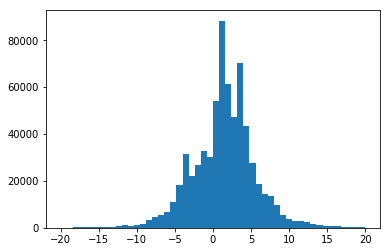

In [16]:
plt.hist(sample_df['cp'], bins=50);

In [68]:
X_sample = sample_df.drop('cp', axis=1)
y_sample = sample_df['cp']

In [69]:
y_sample = y_sample
y_sample.min()

-19.99

In [70]:
mm = MinMaxScaler(feature_range=(0,1))

y_sample_array = np.array(y_sample)
y_sample_scaled = mm.fit_transform(y_sample_array.reshape(-1,1))


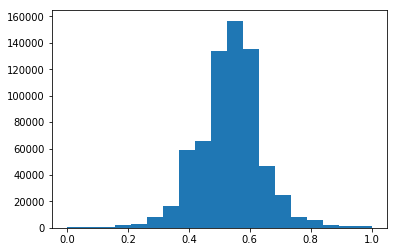

In [71]:
plt.hist(y_sample_scaled, bins=19);

In [72]:
#y_sample_scaled = minmax_scale(y_sample)

In [73]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_sample, y_sample_scaled, train_size=.92, random_state=2)

In [74]:
sgd = SGD(lr=0.02, decay=1e-9, momentum=0.6, nesterov=False)

Model2 = Sequential()
Model2.add(Dense(385, input_dim=385, activation='tanh'))
Model2.add(Dropout(0.1))
Model2.add(Dense(385, activation='elu'))
Model2.add(Dropout(0.2))
Model2.add(Dense(64, activation='elu'))
Model2.add(Dropout(0.2))
Model2.add(Dense(1, activation='sigmoid'))


Model2.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mse'])


In [48]:
history2 = Model2.fit(X_train,
                        y_train,
                        epochs = 5, 
                        batch_size=256, 
                        use_multiprocessing=True,
                        validation_split=.05,
                        verbose=1)

Train on 588011 samples, validate on 30948 samples
Epoch 1/5
588011/588011 [==============================] - 62s 105us/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2/5
588011/588011 [==============================] - 60s 101us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3/5
588011/588011 [==============================] - 59s 100us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 4/5
588011/588011 [==============================] - 59s 101us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 5/5
588011/588011 [==============================] - 58s 99us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0105 - val_mse: 0.0105


In [75]:
y_pred = Model2.predict(X_test)

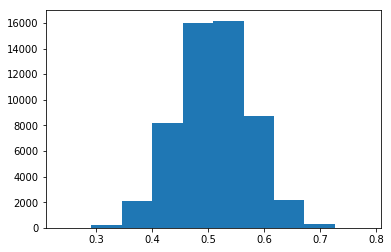

In [76]:
plt.hist(y_pred);

In [77]:
y_pred.shape

(53823, 1)

In [78]:
y_pred = mm.inverse_transform(y_pred)
y_pred = y_pred 

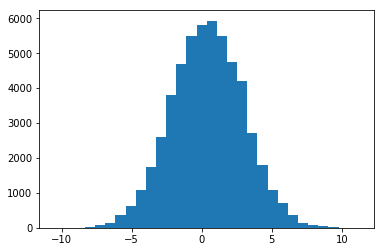

In [80]:
plt.hist(y_pred, bins=30);

In [81]:
Model2.save('model2.h5')

In [ ]:
Model2

# Apply KDTRES?


In [ ]:
from sklearn.neighbors import KDTree


In [ ]:
tree = KDTree(X_str_dummies)